In [7]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python-headless numpy

import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()

def preprocess(img):
    img = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharp = cv2.filter2D(gray, -1, kernel)

    _, thresh = cv2.threshold(sharp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def run_ocr(image_path):
    img = cv2.imread(image_path)
    processed = preprocess(img)

    config = "--oem 3 --psm 7"
    text = pytesseract.image_to_string(processed, lang="eng", config=config)
    print("=========== OCR TEXT OUTPUT ===========\n")
    print(text)
    print("=======================================\n")
    print("Original Image:")
    cv2_imshow(img)
    print("Processed Image:")
    cv2_imshow(processed)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


Saving Testing.png to Testing (2).png


=========== OCR TEXT OUTPUT ===========

hello I‘m from PMU


Original Image:


Processed Image:


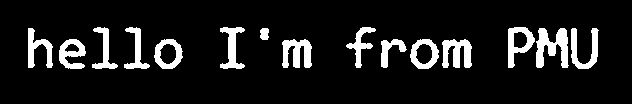

In [8]:
run_ocr("Testing (2).png")
